In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import numpy as np

###<b> Creating dataset for an And Gate</b>

In [ ]:
x = np.array([[0,0], [0,1], [1,0], [1,1]], "uint8")
y  = np.array([[0], [0], [0], [1]], "uint8")

### CREATING A SEQUENTIAL MODEL USING TENSORFLOW

In [ ]:
model = Sequential()
model.add(Dense(units=1, activation='sigmoid',input_dim=2))   ## MODEL CONTAINS ONLY ONE OUTPUT NEURON
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


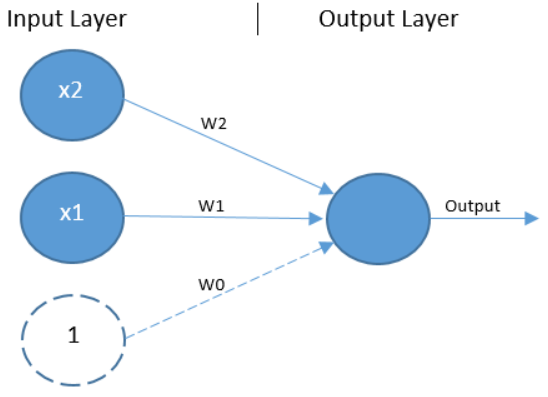

In [ ]:
model.fit(x, y, epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 690/4200
1/1 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.7500
Epoch 691/4200
1/1 [==============================] - 0s 10ms/step - loss: 0.4311 - accuracy: 0.7500
Epoch 692/4200
1/1 [==============================] - 0s 14ms/step - loss: 0.4310 - accuracy: 0.7500
Epoch 693/4200
1/1 [==============================] - 0s 8ms/step - loss: 0.4308 - accuracy: 0.7500
Epoch 694/4200
1/1 [==============================] - 0s 7ms/step - loss: 0.4307 - accuracy: 0.7500
Epoch 695/4200
1/1 [==============================] - 0s 8ms/step - loss: 0.4305 - accuracy: 0.7500
Epoch 696/4200
1/1 [==============================] - 0s 7ms/step - loss: 0.4304 - accuracy: 0.7500
Epoch 697/4200
1/1 [==============================] - 0s 6ms/step - loss: 0.4303 - accuracy: 0.7500
Epoch 698/4200
1/1 [==============================] - 0s 9ms/step - loss: 0.4301 - accuracy: 0.7500
Epoch 699/4200
1/1 [===========================

In [ ]:
print(model.layers[0].get_weights())

[array([[-2.4199455],
       [-3.7854125]], dtype=float32), array([0.9639279], dtype=float32)]


In [ ]:
model.predict(x)

array([[0.72390753],
       [0.05617413],
       [0.18907723],
       [0.00526479]], dtype=float32)

### CREATING DATABASE FOR A XOR GATE

In [ ]:
x = [[0,0], [0,1], [1,0], [1,1]]
y = [[0], [1], [1], [0]]

In [ ]:
xor = Sequential()
xor.add(Dense(2, input_dim=2, activation='sigmoid'))  # hidden layer with 2 neurons
xor.add(Dense(1, activation='sigmoid'))    # output layer with 1 neuron
xor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
xor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


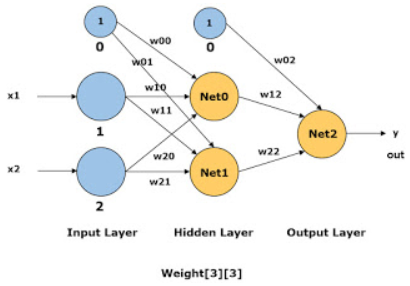

In [ ]:
xor.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 1s 564ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6981 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6979 - accuracy: 0.5000
Epoch 11/5000
1/1

In [ ]:
xor.get_weights()

NameError: ignored

In [ ]:
xor.predict(x)

### Deep Neural Network

In [ ]:
## IMPORTING DATASET

from keras.datasets import mnist

data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

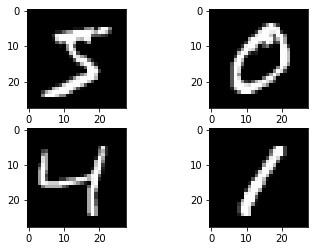

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [ ]:
# Normalizing values from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim = 28*28, activation='relu'))  ## hidden layer 1
model.add(Dense(64, activation='relu'))  ## hidden layer 2
model.add(Dense(10, activation='softmax'))  ## output layer, 10 = number of classes

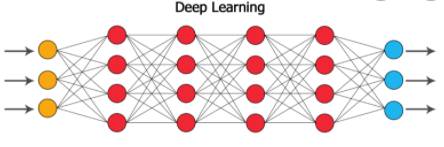

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=100)

Epoch 1/10
480/480 [==============================] - 2s 3ms/step - loss: 0.8796 - accuracy: 0.7517 - val_loss: 0.2430 - val_accuracy: 0.9286
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2295 - accuracy: 0.9342 - val_loss: 0.1885 - val_accuracy: 0.9466
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9496 - val_loss: 0.1638 - val_accuracy: 0.9519
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1414 - accuracy: 0.9566 - val_loss: 0.1627 - val_accuracy: 0.9515
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1224 - accuracy: 0.9637 - val_loss: 0.1479 - val_accuracy: 0.9574
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9687 - val_loss: 0.1297 - val_accuracy: 0.9635
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9721 - val_loss: 0.1311 - val_accuracy: 0.9638
Epoch 

In [ ]:
scores = model.evaluate(X_test, y_test)
print(scores)   ## returns loss and accuracy

313/313 [==============================] - 1s 1ms/step - loss: 0.1143 - accuracy: 0.9645
[0.11430037766695023, 0.9645000100135803]


In [ ]:
predictions = model.predict(X_test)
label=[]
for pred in predictions:
  max_val = max(pred)
  for (i,p) in enumerate(pred):
    if(p==max_val):
      label.append(i)

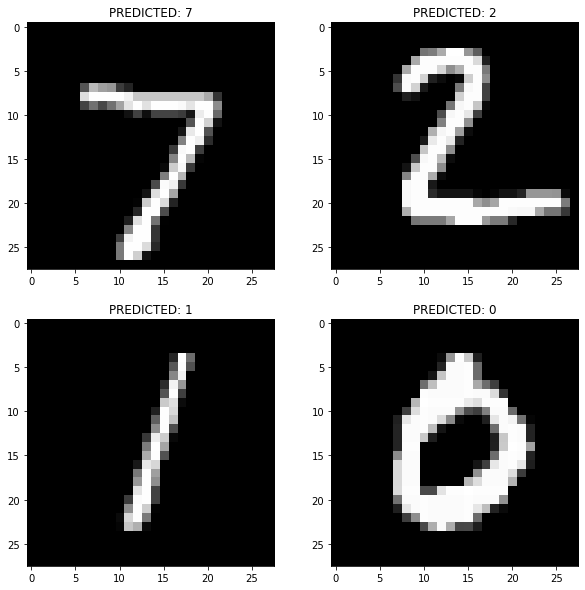

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(X_test[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[0]}')
plt.subplot(222)
plt.imshow(X_test[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[1]}')
plt.subplot(223)
plt.imshow(X_test[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[2]}')
plt.subplot(224)
plt.imshow(X_test[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(f'PREDICTED: {label[3]}')
# show the plot
plt.show()